### Graph Travaux

In [1]:
import pandas as pd
from pyspark.sql import SparkSession

# Initialiser une session Spark
spark = SparkSession.builder \
    .appName("Chantier Analysis") \
    .getOrCreate()

# Chemin du fichier CSV
csv_file_path = "D:\Transport_App\ML_module\data\CSV_Cool\TravauxSNCF_RATP_2019-2022.csv"

# Charger le CSV dans un DataFrame PySpark
df = spark.read.csv(csv_file_path, header=True, inferSchema=True, sep=';')

# Afficher les premières lignes pour vérifier le chargement
df.show()


+------------------+------------------------------------+----------------------+--------------------+-----------------------+-----------------------------+------------+-----------------------------+--------------------------+--------------------+------------------------+-------------------------+--------------------+--------------------+
|Référence Chantier|Code postal arrondissement - Commune|Date début du chantier|Date fin du chantier|Responsable du chantier|Maîtrise d'ouvrage principale|Surface (m2)|Synthèse - Nature du chantier|Encombrement espace public|Impact stationnement|Identifiant demande CITE|Identifiant Chantier CITE|           geo_shape|        geo_point_2d|
+------------------+------------------------------------+----------------------+--------------------+-----------------------+-----------------------------+------------+-----------------------------+--------------------------+--------------------+------------------------+-------------------------+--------------------+--

In [2]:
# Afficher le schéma du DataFrame pour comprendre les types de données
df.printSchema()

# Convertir le DataFrame en Pandas pour une utilisation avec matplotlib/seaborn
pdf = df.toPandas()


root
 |-- Référence Chantier: string (nullable = true)
 |-- Code postal arrondissement - Commune: string (nullable = true)
 |-- Date début du chantier: date (nullable = true)
 |-- Date fin du chantier: date (nullable = true)
 |-- Responsable du chantier: string (nullable = true)
 |-- Maîtrise d'ouvrage principale: string (nullable = true)
 |-- Surface (m2): double (nullable = true)
 |-- Synthèse - Nature du chantier: string (nullable = true)
 |-- Encombrement espace public: string (nullable = true)
 |-- Impact stationnement: string (nullable = true)
 |-- Identifiant demande CITE: integer (nullable = true)
 |-- Identifiant Chantier CITE: integer (nullable = true)
 |-- geo_shape: string (nullable = true)
 |-- geo_point_2d: string (nullable = true)



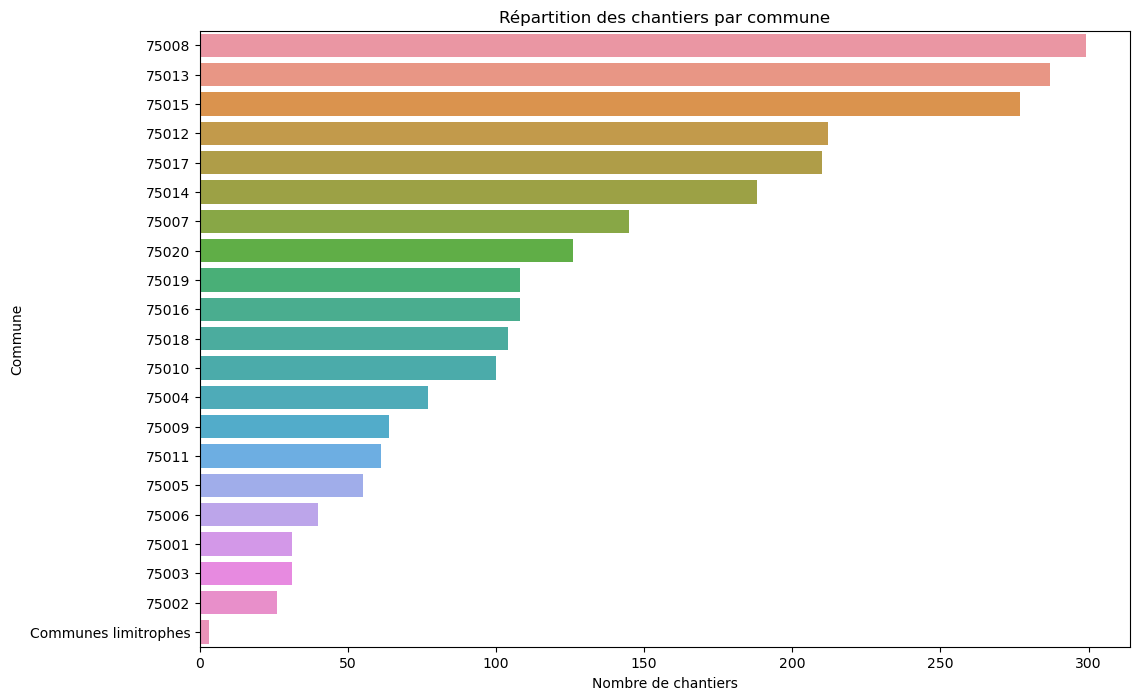

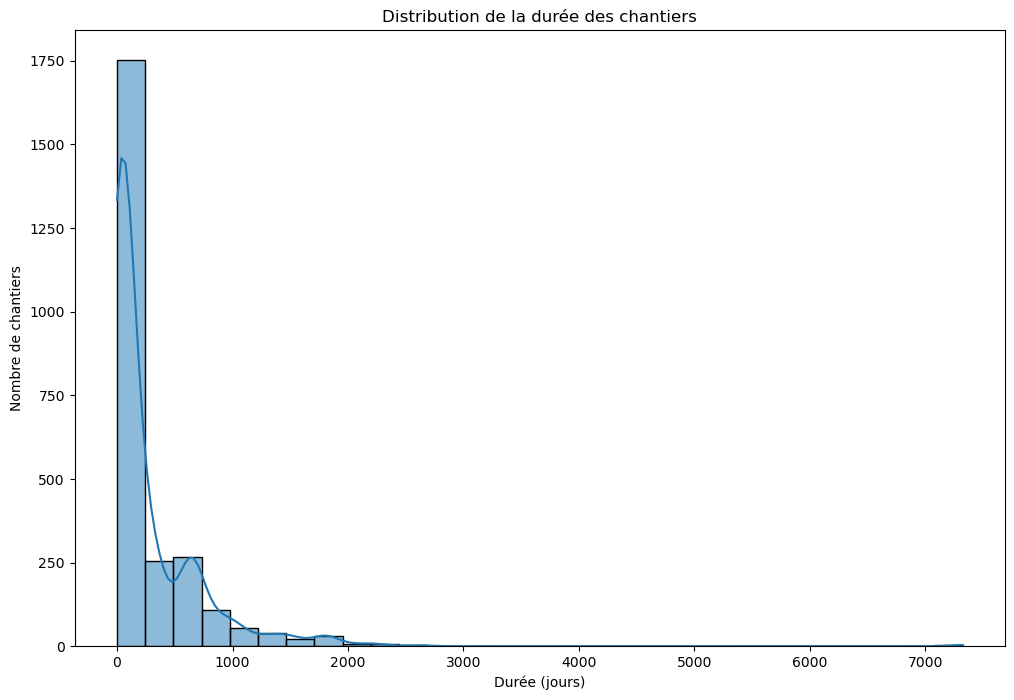

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple 1 : Répartition des chantiers par commune
plt.figure(figsize=(12, 8))
sns.countplot(y='Code postal arrondissement - Commune', data=pdf, order=pdf['Code postal arrondissement - Commune'].value_counts().index)
plt.title('Répartition des chantiers par commune')
plt.xlabel('Nombre de chantiers')
plt.ylabel('Commune')
plt.show()

# Exemple 2 : Durée des chantiers
pdf['Date début du chantier'] = pd.to_datetime(pdf['Date début du chantier'])
pdf['Date fin du chantier'] = pd.to_datetime(pdf['Date fin du chantier'])
pdf['Durée (jours)'] = (pdf['Date fin du chantier'] - pdf['Date début du chantier']).dt.days

plt.figure(figsize=(12, 8))
sns.histplot(pdf['Durée (jours)'], bins=30, kde=True)
plt.title('Distribution de la durée des chantiers')
plt.xlabel('Durée (jours)')
plt.ylabel('Nombre de chantiers')
plt.show()


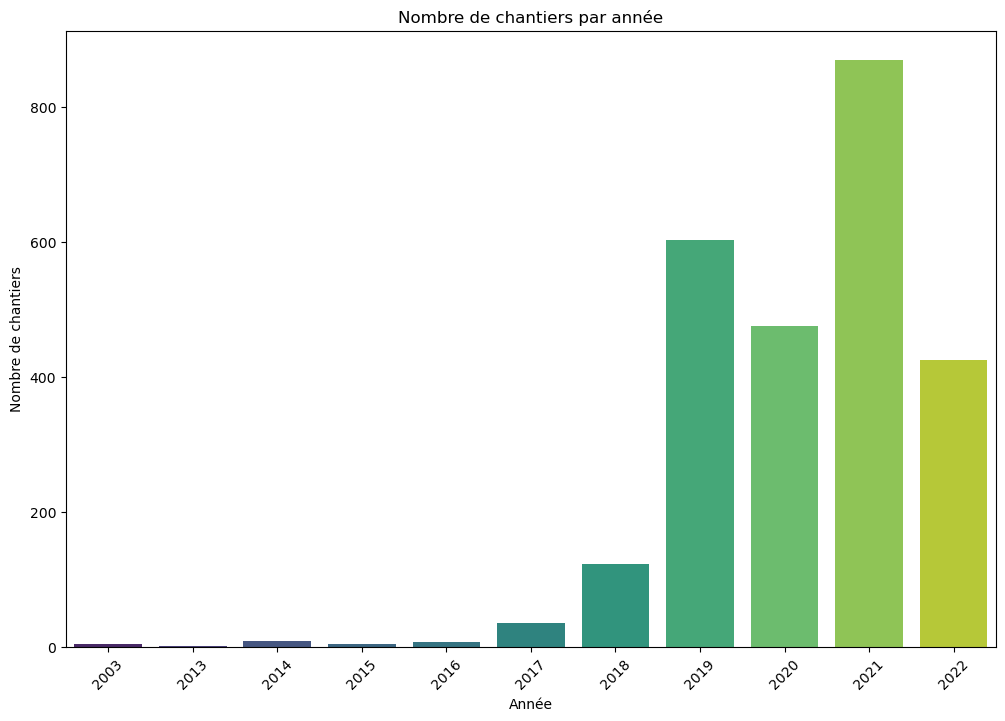

In [4]:
# Extraire l'année de début du chantier
pdf['Année début'] = pdf['Date début du chantier'].dt.year

# Graphique du nombre de chantiers par année
plt.figure(figsize=(12, 8))
sns.countplot(x='Année début', data=pdf, palette='viridis')
plt.title('Nombre de chantiers par année')
plt.xlabel('Année')
plt.ylabel('Nombre de chantiers')
plt.xticks(rotation=45)
plt.show()


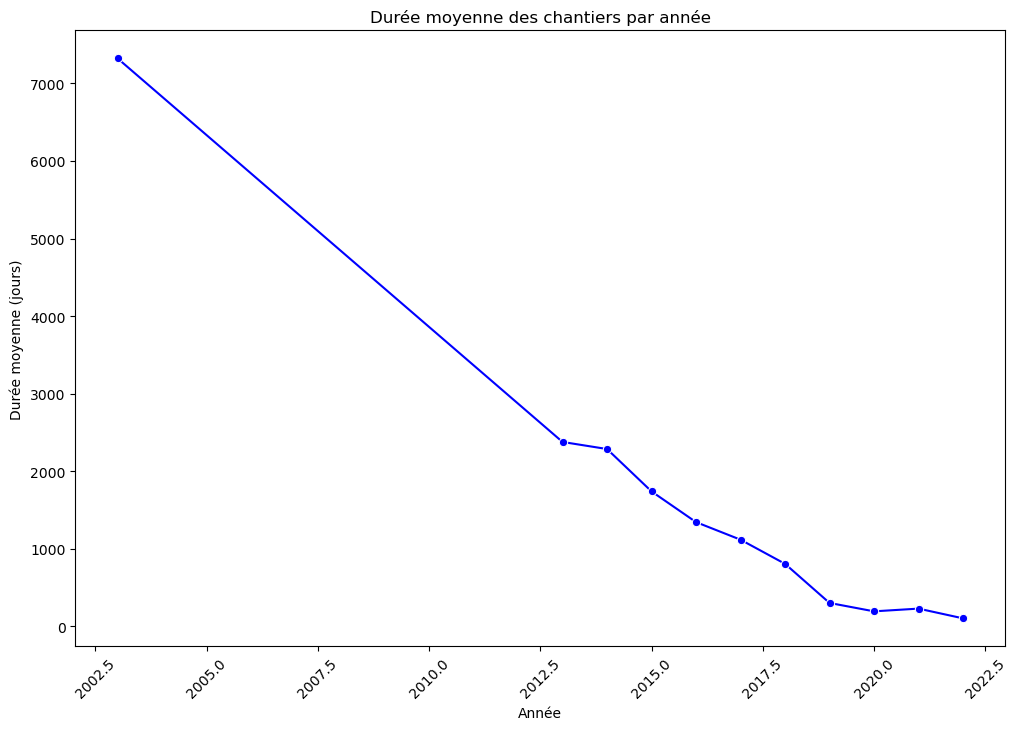

In [5]:
# Calculer la durée des chantiers
pdf['Durée (jours)'] = (pdf['Date fin du chantier'] - pdf['Date début du chantier']).dt.days

# Calculer la durée moyenne par année
mean_duration_per_year = pdf.groupby('Année début')['Durée (jours)'].mean().reset_index()

# Graphique de la durée moyenne des chantiers par année
plt.figure(figsize=(12, 8))
sns.lineplot(x='Année début', y='Durée (jours)', data=mean_duration_per_year, marker='o', color='b')
plt.title('Durée moyenne des chantiers par année')
plt.xlabel('Année')
plt.ylabel('Durée moyenne (jours)')
plt.xticks(rotation=45)
plt.show()


In [6]:
import pandas as pd
import folium

# Chemin correct vers le fichier CSV
csv_file_path = "D:\Transport_App\ML_module\data\CSV_Cool\TravauxSNCF_RATP_2019-2022.csv"

# Charger le fichier CSV
df = pd.read_csv(csv_file_path, delimiter=';')

# Créer une carte centrée sur Paris
map_chantiers = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Ajouter les chantiers sur la carte
for idx, row in df.iterrows():
    if pd.notna(row['geo_point_2d']):
        coords = list(map(float, row['geo_point_2d'].split(',')))
        folium.Marker(
            location=coords,
            popup=f"{row['Référence Chantier']} - {row['Synthèse - Nature du chantier']}",
            tooltip=row['Synthèse - Nature du chantier']
        ).add_to(map_chantiers)

# Sauvegarder la carte dans un fichier HTML
map_chantiers.save('carte_chantiers.html')

# Afficher la carte dans un notebook (si vous utilisez un notebook)
map_chantiers


### Graph Pops

                      Geo Point  \
0  48.6143359877, 2.80672187701   
1   48.922738238, 2.70848232012   
2  48.6668300608, 3.35256345807   
3  48.8432766256, 2.81653798016   
4  48.4483506973, 2.60080206666   

                                           Geo Shape  insee   rp2006  \
0  {"coordinates": [[2.806721877012404, 48.614335...  77004   117.00   
1  {"coordinates": [[2.708482320116412, 48.922738...  77005  1201.00   
2  {"coordinates": [[3.352563458068729, 48.666830...  77012   112.85   
3  {"coordinates": [[2.816537980161528, 48.843276...  77018  1882.00   
4  {"coordinates": [[2.60080206666203, 48.4483506...  77022   640.98   

        rp2007   rp2008       rp2009       rp2010   rp2011   rp2012  ...  \
0   117.037393   114.42   127.926420   126.672241   125.00   121.24  ...   
1  1214.000000  1217.00  1236.846119  1224.612555  1212.00  1210.00  ...   
2   114.924194   117.00   115.112904   114.735484   114.62   115.00  ...   
3  1942.000002  1950.00  2189.002307  2321.179247  2

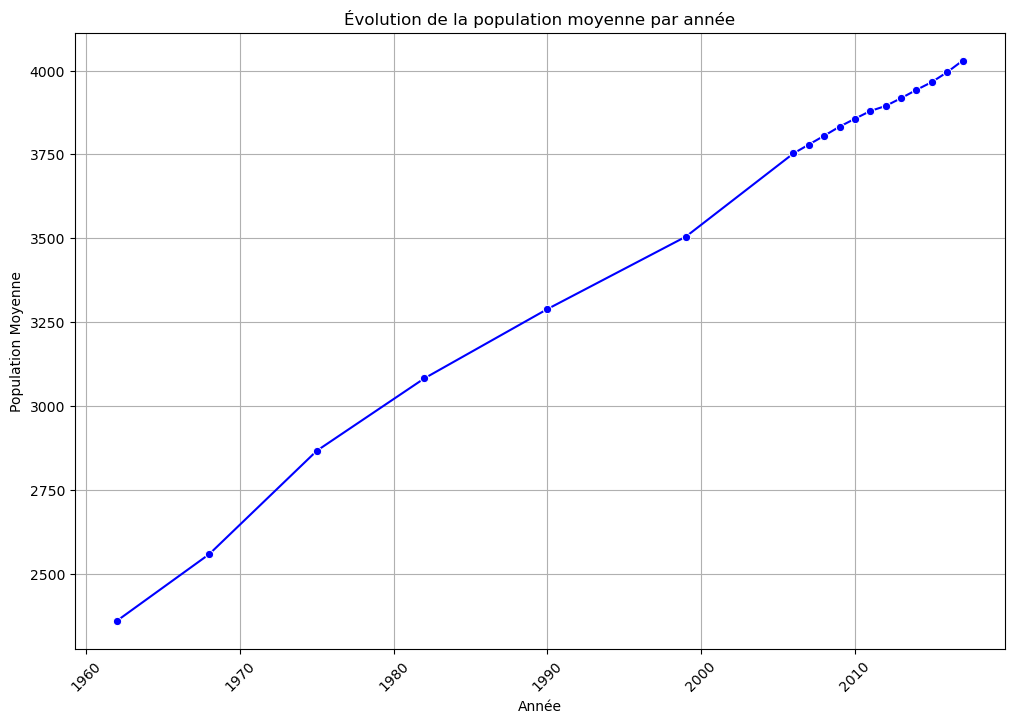

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chemin vers le fichier CSV
csv_file_path = "D:\\Transport_App\\ML_module\\data_model\\population_evol_depart\\nombre-de-residences-principales-des-communes-dile-de-france-donnee-insee0.csv"


# Charger le fichier CSV
df = pd.read_csv(csv_file_path, delimiter=';')

# Vérifier les premières lignes du DataFrame
print(df.head())

# Liste des colonnes de population par année
population_columns = ['rp1962', 'rp1968', 'rp1975', 'rp1982', 'rp1990', 'rp1999', 'rp2006', 'rp2007', 'rp2008', 'rp2009', 'rp2010', 'rp2011', 'rp2012', 'rp2013', 'rp2014', 'rp2015', 'rp2016', 'rp2017']

# Calculer la moyenne de la population par année
population_mean = df[population_columns].mean().reset_index()
population_mean.columns = ['Année', 'Population Moyenne']

# Convertir l'année en format entier
population_mean['Année'] = population_mean['Année'].str.extract('(\d+)').astype(int)

# Graphique de l'évolution de la population moyenne par année
plt.figure(figsize=(12, 8))
sns.lineplot(x='Année', y='Population Moyenne', data=population_mean, marker='o', color='b')
plt.title('Évolution de la population moyenne par année')
plt.xlabel('Année')
plt.ylabel('Population Moyenne')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


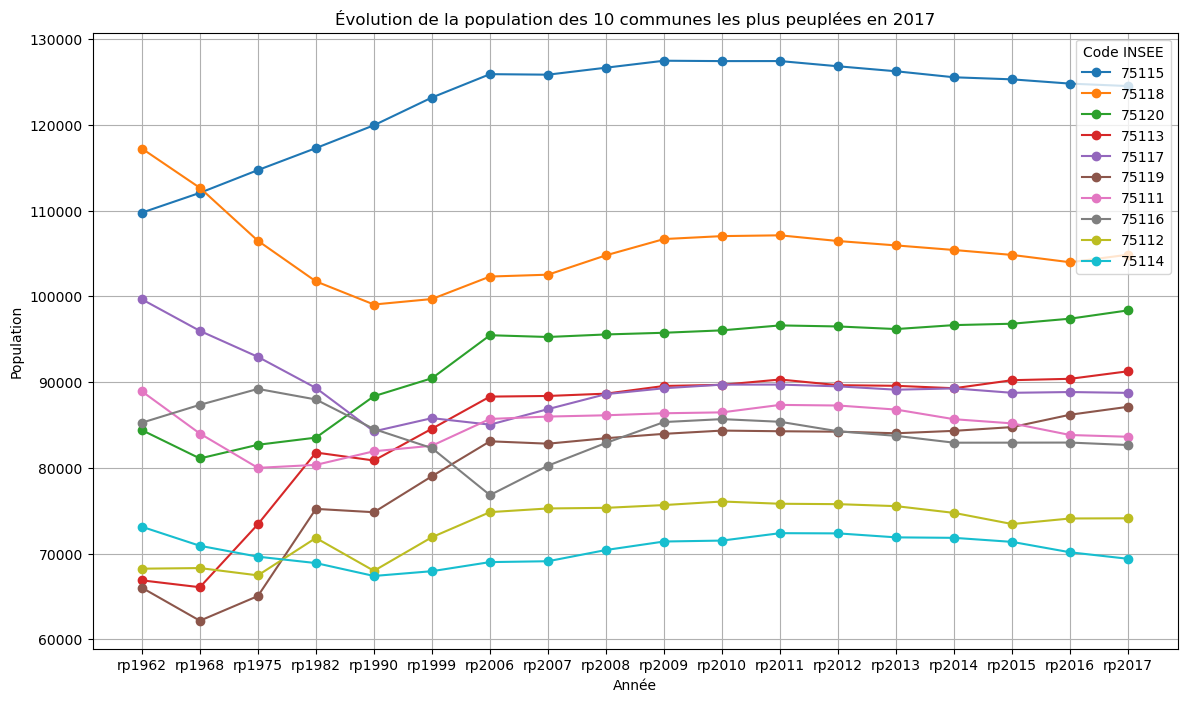

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = "D:\\Transport_App\\ML_module\\data_model\\population_evol_depart\\nombre-de-residences-principales-des-communes-dile-de-france-donnee-insee0.csv"

df = pd.read_csv(csv_file_path, delimiter=';')

population_columns = ['rp1962', 'rp1968', 'rp1975', 'rp1982', 'rp1990', 'rp1999', 'rp2006', 'rp2007', 'rp2008', 'rp2009', 'rp2010', 'rp2011', 'rp2012', 'rp2013', 'rp2014', 'rp2015', 'rp2016', 'rp2017']

top10_communes = df.nlargest(10, 'rp2017')

plt.figure(figsize=(14, 8))
for idx, row in top10_communes.iterrows():
    plt.plot(population_columns, row[population_columns], marker='o', label=row['insee'])

plt.title("Évolution de la population des 10 communes les plus peuplées en 2017")
plt.xlabel("Année")
plt.ylabel("Population")
plt.legend(title='Code INSEE')
plt.grid(True)
plt.show()


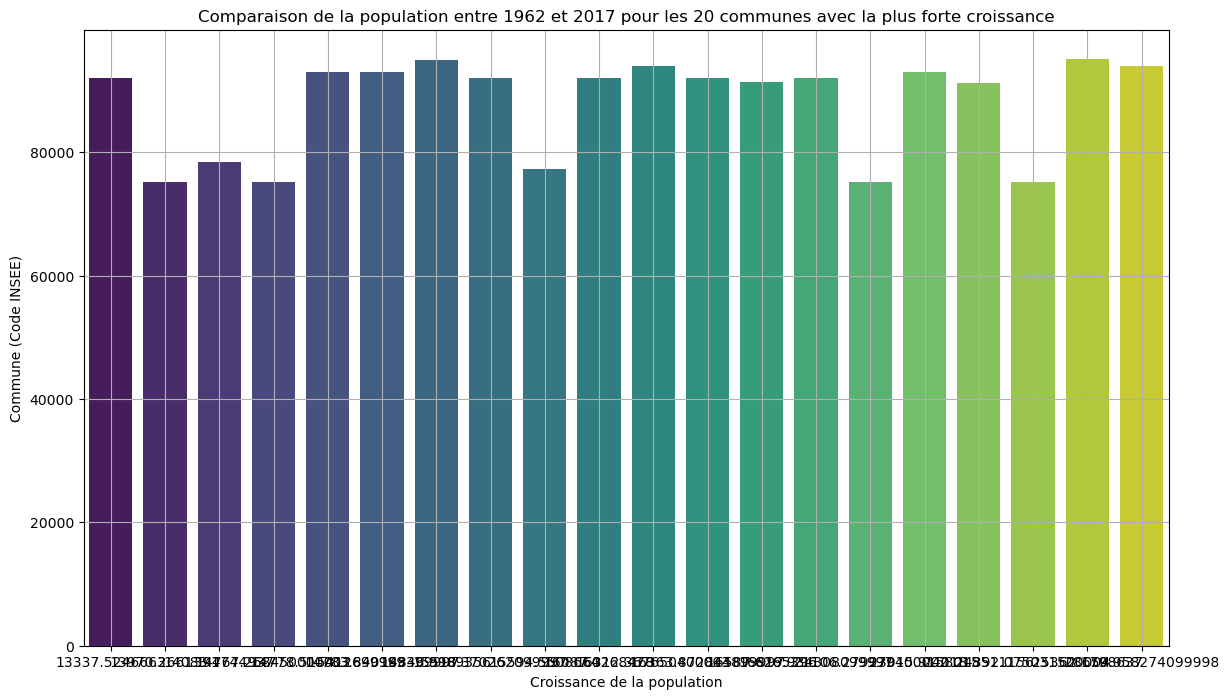

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = "D:\\Transport_App\\ML_module\\data_model\\population_evol_depart\\nombre-de-residences-principales-des-communes-dile-de-france-donnee-insee0.csv"

df = pd.read_csv(csv_file_path, delimiter=';')

df['Croissance_1962_2017'] = df['rp2017'] - df['rp1962']

plt.figure(figsize=(14, 8))
sns.barplot(data=df.sort_values(by='Croissance_1962_2017', ascending=False).head(20),
            x='Croissance_1962_2017', y='insee', palette='viridis')
plt.title('Comparaison de la population entre 1962 et 2017 pour les 20 communes avec la plus forte croissance')
plt.xlabel('Croissance de la population')
plt.ylabel('Commune (Code INSEE)')
plt.grid(True)
plt.show()


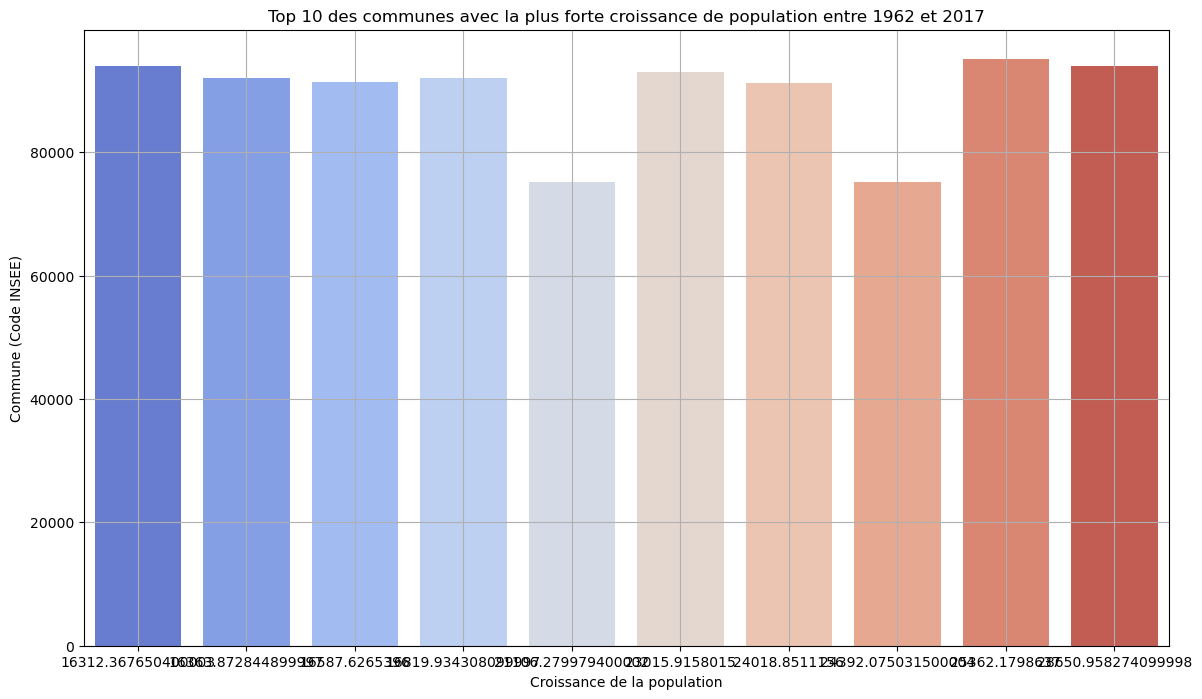

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = "D:\\Transport_App\\ML_module\\data_model\\population_evol_depart\\nombre-de-residences-principales-des-communes-dile-de-france-donnee-insee0.csv"

df = pd.read_csv(csv_file_path, delimiter=';')

df['Croissance_1962_2017'] = df['rp2017'] - df['rp1962']

top10_croissance = df.nlargest(10, 'Croissance_1962_2017')

plt.figure(figsize=(14, 8))
sns.barplot(data=top10_croissance, x='Croissance_1962_2017', y='insee', palette='coolwarm')
plt.title('Top 10 des communes avec la plus forte croissance de population entre 1962 et 2017')
plt.xlabel('Croissance de la population')
plt.ylabel('Commune (Code INSEE)')
plt.grid(True)
plt.show()


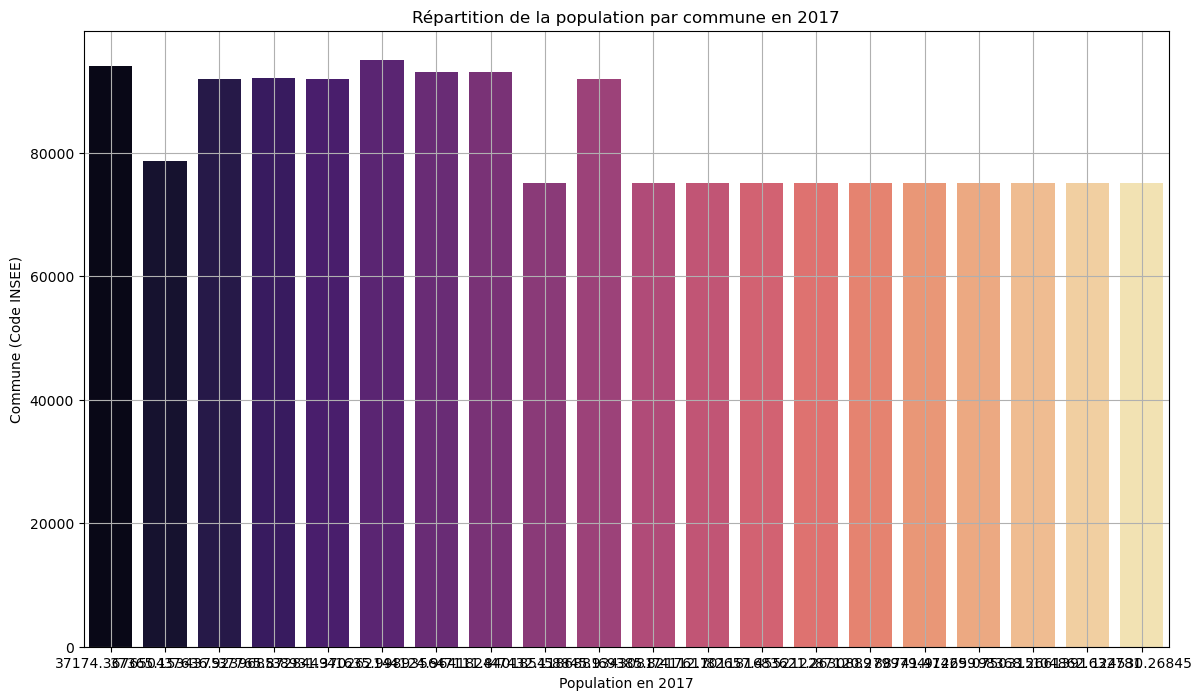

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = "D:\\Transport_App\\ML_module\\data_model\\population_evol_depart\\nombre-de-residences-principales-des-communes-dile-de-france-donnee-insee0.csv"

df = pd.read_csv(csv_file_path, delimiter=';')

plt.figure(figsize=(14, 8))
sns.barplot(data=df.sort_values(by='rp2017', ascending=False).head(20), x='rp2017', y='insee', palette='magma')
plt.title('Répartition de la population par commune en 2017')
plt.xlabel('Population en 2017')
plt.ylabel('Commune (Code INSEE)')
plt.grid(True)
plt.show()


In [29]:
import pandas as pd
import folium

csv_file_path = "D:\\Transport_App\\ML_module\\data_model\\population_evol_depart\\nombre-de-residences-principales-des-communes-dile-de-france-donnee-insee0.csv"

df = pd.read_csv(csv_file_path, delimiter=';')

# Séparer les coordonnées géographiques
df[['lat', 'lon']] = df['Geo Point'].str.split(',', expand=True)
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)

# Créer une carte centrée sur Paris
map_population = folium.Map(location=[48.8566, 2.3522], zoom_start=10)

# Ajouter les marqueurs des communes avec la population en 2017
for idx, row in df.iterrows():
    if not pd.isna(row['lat']) and not pd.isna(row['lon']) and not pd.isna(row['rp2017']):
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=5,
            popup=f"{row['insee']} - Population 2017: {int(row['rp2017'])}",
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(map_population)

# Sauvegarder la carte dans un fichier HTML
map_population.save('carte_population_2017.html')
print("Carte sauvegardée sous 'carte_population_2017.html'")


Carte sauvegardée sous 'carte_population_2017.html'


In [9]:
import pandas as pd
import folium
import os

# Chemin vers le fichier CSV
csv_file_path = "D:\\Transport_App\\ML_module\\data_model\\population_evol_depart\\nombre-de-residences-principales-des-communes-dile-de-france-donnee-insee0.csv"

# Charger le fichier CSV
df = pd.read_csv(csv_file_path, delimiter=';')

# Séparer les coordonnées géographiques
df[['lat', 'lon']] = df['Geo Point'].str.split(',', expand=True)
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)

# Liste des colonnes de population par année
population_columns = ['rp1962', 'rp1968', 'rp1975', 'rp1982', 'rp1990', 'rp1999', 'rp2006', 'rp2007', 'rp2008', 'rp2009', 'rp2010', 'rp2011', 'rp2012', 'rp2013', 'rp2014', 'rp2015', 'rp2016', 'rp2017']

# Créer un dossier pour sauvegarder les cartes
os.makedirs('maps', exist_ok=True)

# Créer une carte pour chaque année
for year in population_columns:
    map_population = folium.Map(location=[48.8566, 2.3522], zoom_start=10)  # Centré sur Paris
    
    for idx, row in df.iterrows():
        if not pd.isna(row['lat']) and not pd.isna(row['lon']) and not pd.isna(row[year]):
            folium.CircleMarker(
                location=[row['lat'], row['lon']],
                radius=5,
                popup=f"{row['insee']} - {year}: {int(row[year])} résidences principales",
                color='blue',
                fill=True,
                fill_color='blue'
            ).add_to(map_population)
    
    # Sauvegarder la carte dans un fichier HTML
    map_filename = f"maps/map_population_{year}.html"
    map_population.save(map_filename)
    print(f"Carte pour {year} sauvegardée sous {map_filename}")


Carte pour rp1962 sauvegardée sous maps/map_population_rp1962.html
Carte pour rp1968 sauvegardée sous maps/map_population_rp1968.html
Carte pour rp1975 sauvegardée sous maps/map_population_rp1975.html
Carte pour rp1982 sauvegardée sous maps/map_population_rp1982.html
Carte pour rp1990 sauvegardée sous maps/map_population_rp1990.html
Carte pour rp1999 sauvegardée sous maps/map_population_rp1999.html
Carte pour rp2006 sauvegardée sous maps/map_population_rp2006.html
Carte pour rp2007 sauvegardée sous maps/map_population_rp2007.html
Carte pour rp2008 sauvegardée sous maps/map_population_rp2008.html
Carte pour rp2009 sauvegardée sous maps/map_population_rp2009.html
Carte pour rp2010 sauvegardée sous maps/map_population_rp2010.html
Carte pour rp2011 sauvegardée sous maps/map_population_rp2011.html
Carte pour rp2012 sauvegardée sous maps/map_population_rp2012.html
Carte pour rp2013 sauvegardée sous maps/map_population_rp2013.html
Carte pour rp2014 sauvegardée sous maps/map_population_rp2014.

### Graph indacteur qualité 

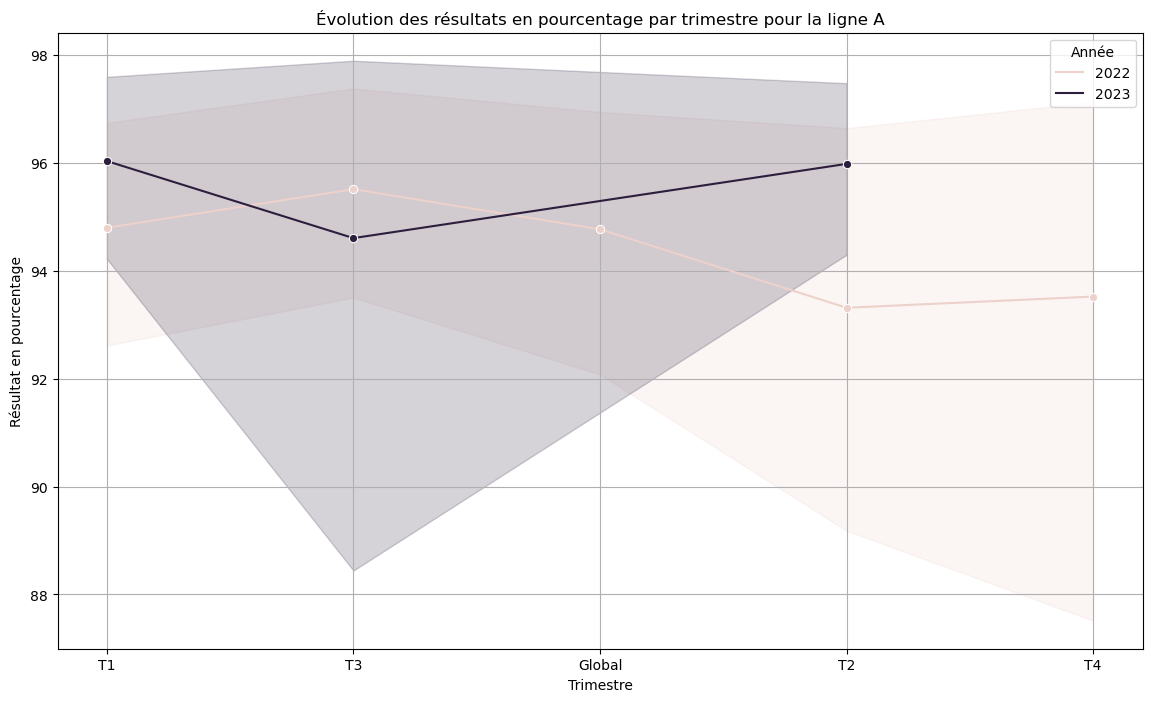

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chemin vers le fichier CSV
csv_file_path = "D:\Transport_App\ML_module\data_model\indicateurs-qualite-service-sncf-ratp.csv"

# Charger le fichier CSV
df = pd.read_csv(csv_file_path, delimiter=';')

# Filtrer pour une ligne spécifique (par exemple, ligne 'A')
ligne = 'A'
df_ligne = df[df['Name_Line'] == ligne]

# Graphique de l'évolution des résultats par trimestre et par année pour une ligne donnée
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_ligne, x='Trimestre', y='ResultatEnPourcentage', hue='Annee', marker='o')
plt.title(f'Évolution des résultats en pourcentage par trimestre pour la ligne {ligne}')
plt.xlabel('Trimestre')
plt.ylabel('Résultat en pourcentage')
plt.legend(title='Année')
plt.grid(True)
plt.show()


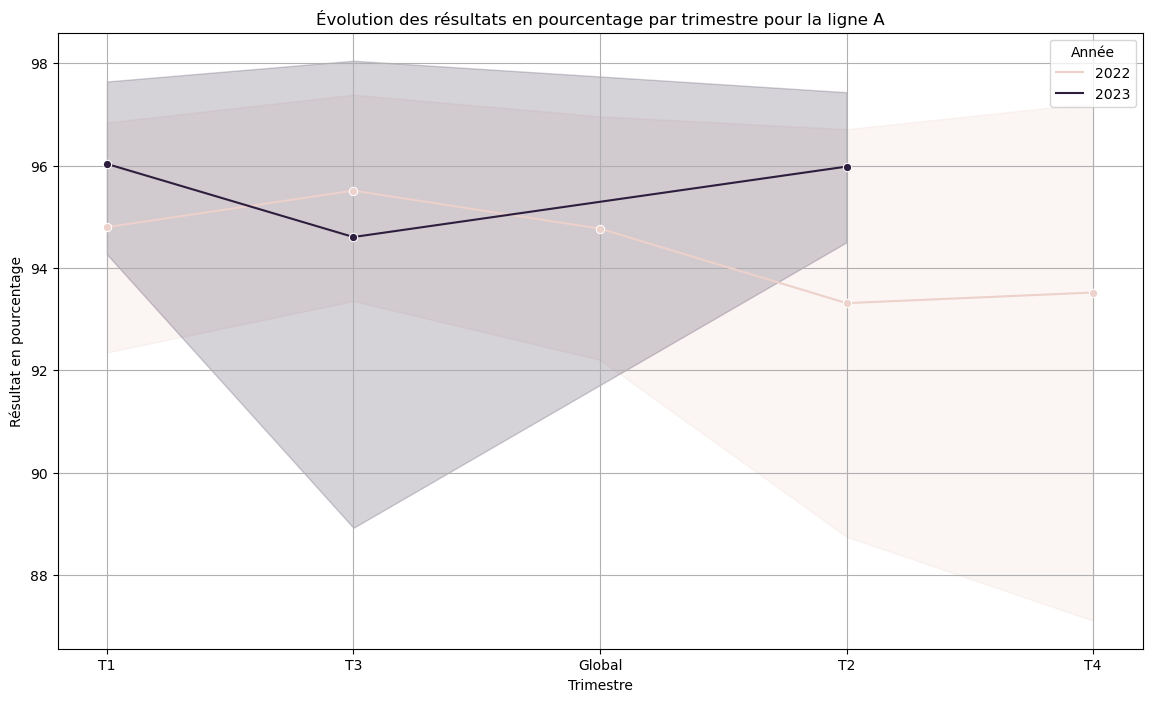

ValueError: min() arg is an empty sequence

<Figure size 1400x800 with 0 Axes>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = "D:\Transport_App\ML_module\data_model\indicateurs-qualite-service-sncf-ratp.csv"

df = pd.read_csv(csv_file_path, delimiter=';')

# 1. Évolution des résultats par trimestre et par année pour une ligne donnée
ligne = 'A'
df_ligne = df[df['Name_Line'] == ligne]
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_ligne, x='Trimestre', y='ResultatEnPourcentage', hue='Annee', marker='o')
plt.title(f'Évolution des résultats en pourcentage par trimestre pour la ligne {ligne}')
plt.xlabel('Trimestre')
plt.ylabel('Résultat en pourcentage')
plt.legend(title='Année')
plt.grid(True)
plt.show()

# 2. Comparaison des résultats entre différentes lignes pour un indicateur spécifique
indicateur = 'Ponctualité'
df_indicateur = df[df['Indicateur'] == indicateur]
df_indicateur = df_indicateur[df_indicateur['ResultatEnPourcentage'].notna()]
plt.figure(figsize=(14, 8))
sns.barplot(data=df_indicateur, x='Name_Line', y='ResultatEnPourcentage', hue='Annee')
plt.title(f'Comparaison des résultats pour l\'indicateur {indicateur}')
plt.xlabel('Ligne')
plt.ylabel('Résultat en pourcentage')
plt.legend(title='Année')
plt.grid(True)
plt.show()

# 3. Distribution des résultats en pourcentage pour une année spécifique
annee = 2021
df_annee = df[df['Annee'] == annee]
plt.figure(figsize=(14, 8))
sns.histplot(df_annee['ResultatEnPourcentage'].dropna(), bins=30, kde=True)
plt.title(f'Distribution des résultats en pourcentage pour l\'année {annee}')
plt.xlabel('Résultat en pourcentage')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

# 4. Impact des pénalités par ligne et par indicateur
df_penalite = df[df['Penalite'].notna()]
plt.figure(figsize=(14, 8))
sns.barplot(data=df_penalite, x='Name_Line', y='Penalite', hue='Indicateur')
plt.title('Impact des pénalités par ligne et par indicateur')
plt.xlabel('Ligne')
plt.ylabel('Pénalité')
plt.legend(title='Indicateur')
plt.grid(True)
plt.show()


### Graph Traffic Combiné

In [12]:
import pandas as pd

# Chemin vers le fichier CSV
csv_file_path = "D:\\Transport_App\\ML_module\\data\\CSV_Cool\\validations-reseau-ferre-profils-horaires-par-jour-type-1er-semestre.csv"

# Charger le fichier CSV
df = pd.read_csv(csv_file_path, delimiter=';')

# Afficher les premières lignes pour vérifier le chargement
print(df.head())


   CODE_STIF_TRNS CODE_STIF_RES CODE_STIF_ARRET LIBELLE_ARRET    lda CAT_JOUR  \
0             100           110             300      GALLIENI  71817     JOVS   
1             100           110             300      GALLIENI  71817     JOVS   
2             100           110             300      GALLIENI  71817     JOVS   
3             100           110             300      GALLIENI  71817     JOVS   
4             100           110             300      GALLIENI  71817     SAHV   

  TRNC_HORR_60  pourc_validations  
0      20H-21H               3.50  
1      22H-23H               1.32  
2        3H-4H               0.00  
3        6H-7H               4.17  
4      18H-19H               7.43  


In [13]:
# Calculer le nombre total de validations par station
df['pourc_validations'] = df['pourc_validations'].astype(float)
df_voyageurs = df.groupby('LIBELLE_ARRET')['pourc_validations'].sum().reset_index()
df_voyageurs.columns = ['Station', 'TotalValidations']

# Afficher les résultats
print(df_voyageurs.head())


         Station  TotalValidations
0       ABBESSES            499.98
1          ABLON            500.04
2  ACHERES GRAND            500.00
3  ACHERES VILLE            500.00
4  AEROPORT CDG1            500.02


In [14]:
# Calculer le nombre de correspondances par station
df_correspondances = df['LIBELLE_ARRET'].value_counts().reset_index()
df_correspondances.columns = ['Station', 'NombreDeCorrespondances']

# Afficher les résultats
print(df_correspondances.head())


        Station  NombreDeCorrespondances
0  SAINT-LAZARE                      351
1  GARE DE LYON                      348
2  MONTPARNASSE                      240
3    LA DEFENSE                      240
4      CHATELET                      240


In [15]:
# Fusionner les deux DataFrames
df_comparaison = pd.merge(df_voyageurs, df_correspondances, on='Station')

# Afficher les résultats fusionnés
print(df_comparaison.head())


         Station  TotalValidations  NombreDeCorrespondances
0       ABBESSES            499.98                      111
1          ABLON            500.04                      111
2  ACHERES GRAND            500.00                       99
3  ACHERES VILLE            500.00                      121
4  AEROPORT CDG1            500.02                      117


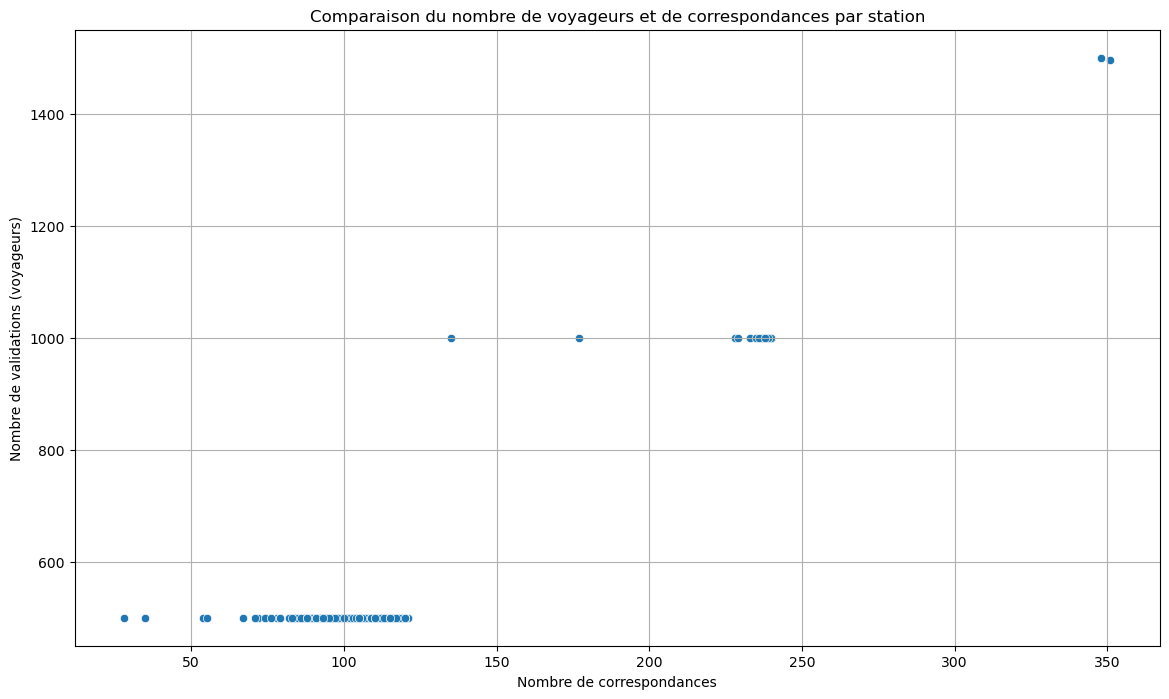

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphique de comparaison
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_comparaison, x='NombreDeCorrespondances', y='TotalValidations')
plt.title('Comparaison du nombre de voyageurs et de correspondances par station')
plt.xlabel('Nombre de correspondances')
plt.ylabel('Nombre de validations (voyageurs)')
plt.grid(True)
plt.show()


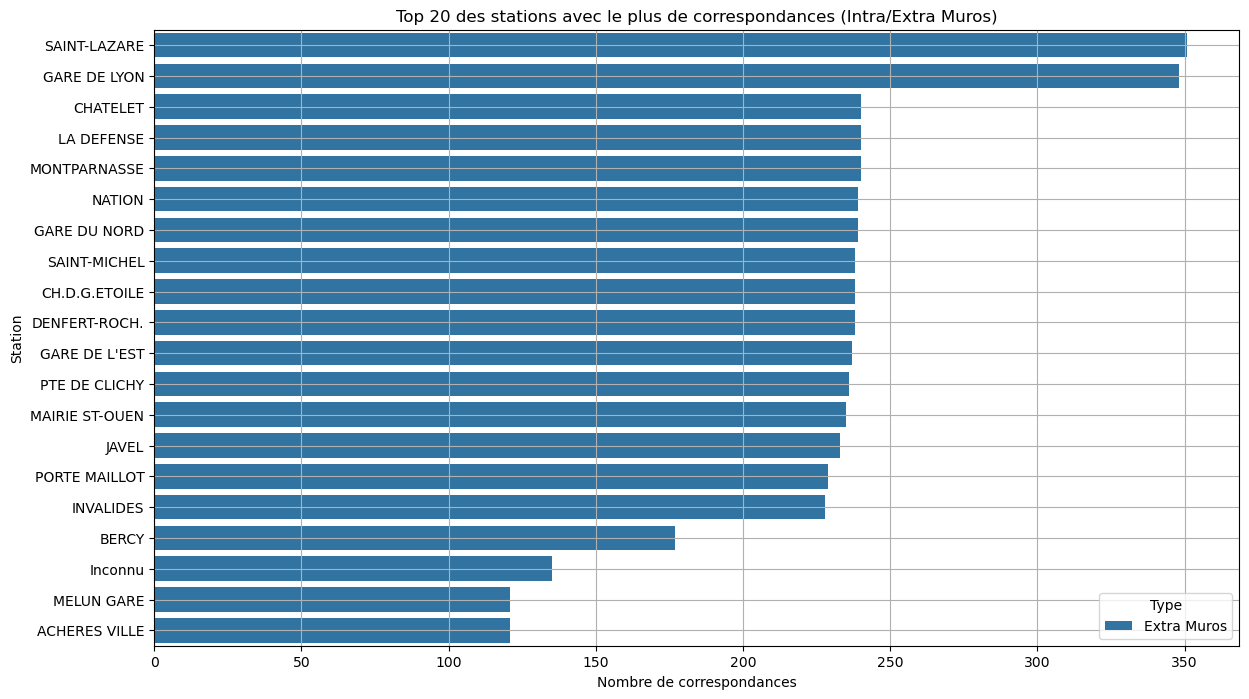

In [17]:
# Liste fictive des stations intra muros (à remplacer par les vraies données)
stations_intra_muros = ['Station1', 'Station2', 'Station3']  # Remplacez par les vraies stations

# Ajouter une colonne pour indiquer si une station est intra ou extra muros
df_comparaison['Type'] = df_comparaison['Station'].apply(lambda x: 'Intra Muros' if x in stations_intra_muros else 'Extra Muros')

# Graphique des stations avec le plus de correspondances
plt.figure(figsize=(14, 8))
sns.barplot(data=df_comparaison.sort_values(by='NombreDeCorrespondances', ascending=False).head(20),
            x='NombreDeCorrespondances', y='Station', hue='Type')
plt.title('Top 20 des stations avec le plus de correspondances (Intra/Extra Muros)')
plt.xlabel('Nombre de correspondances')
plt.ylabel('Station')
plt.legend(title='Type')
plt.grid(True)
plt.show()


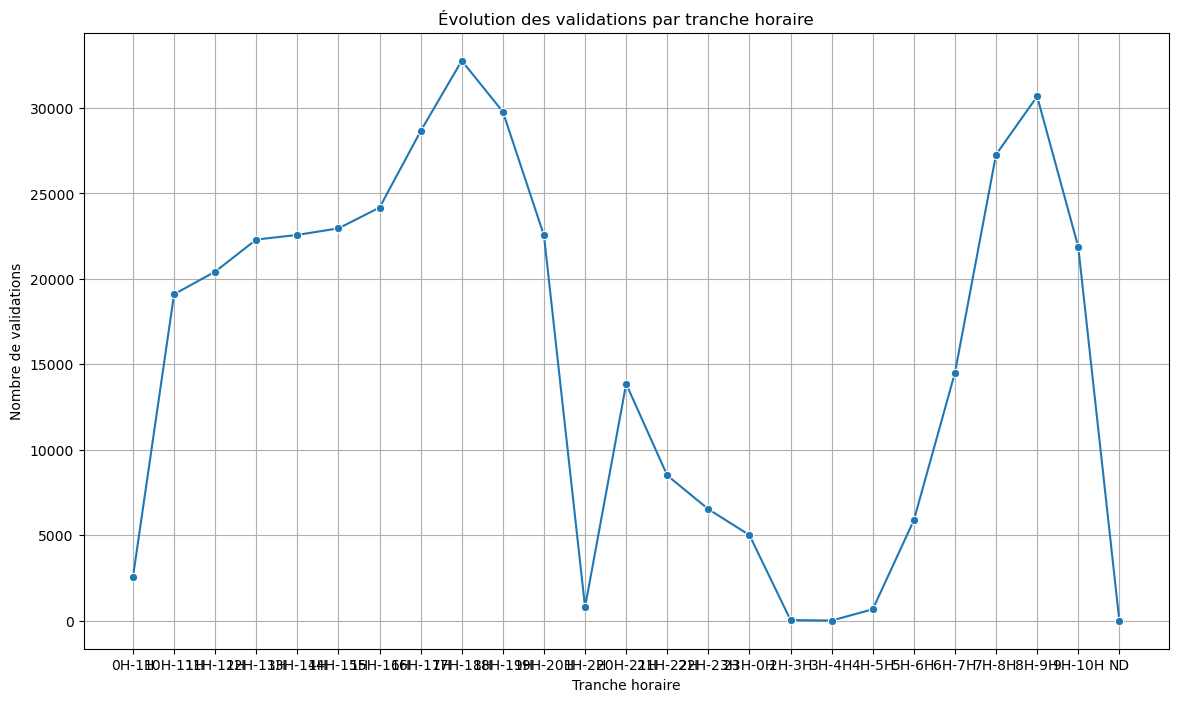

In [18]:
df['pourc_validations'] = df['pourc_validations'].astype(float)
df['TRNC_HORR_60'] = df['TRNC_HORR_60'].astype(str)

# Agréger les données par tranche horaire
df_horaire = df.groupby('TRNC_HORR_60')['pourc_validations'].sum().reset_index()

# Graphique de l'évolution des validations par tranche horaire
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_horaire, x='TRNC_HORR_60', y='pourc_validations', marker='o')
plt.title('Évolution des validations par tranche horaire')
plt.xlabel('Tranche horaire')
plt.ylabel('Nombre de validations')
plt.grid(True)
plt.show()

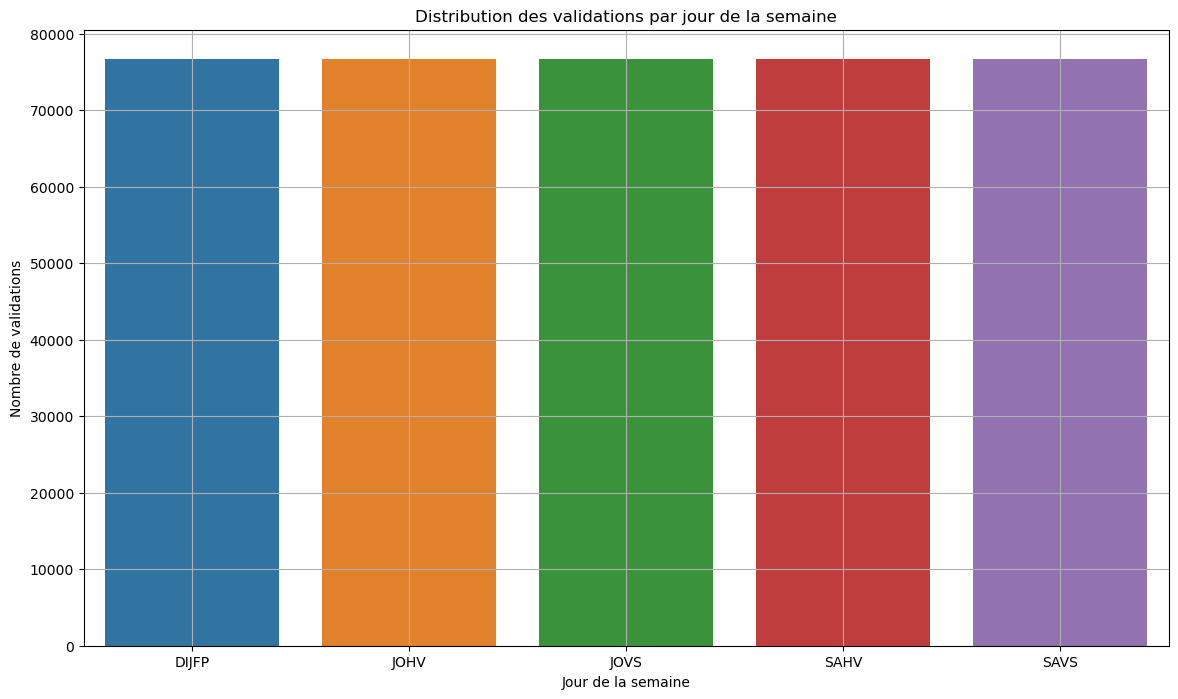

In [19]:
df['CAT_JOUR'] = df['CAT_JOUR'].astype(str)

# Agréger les données par jour de la semaine
df_jour = df.groupby('CAT_JOUR')['pourc_validations'].sum().reset_index()

# Graphique de la distribution des validations par jour de la semaine
plt.figure(figsize=(14, 8))
sns.barplot(data=df_jour, x='CAT_JOUR', y='pourc_validations')
plt.title('Distribution des validations par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de validations')
plt.grid(True)
plt.show()


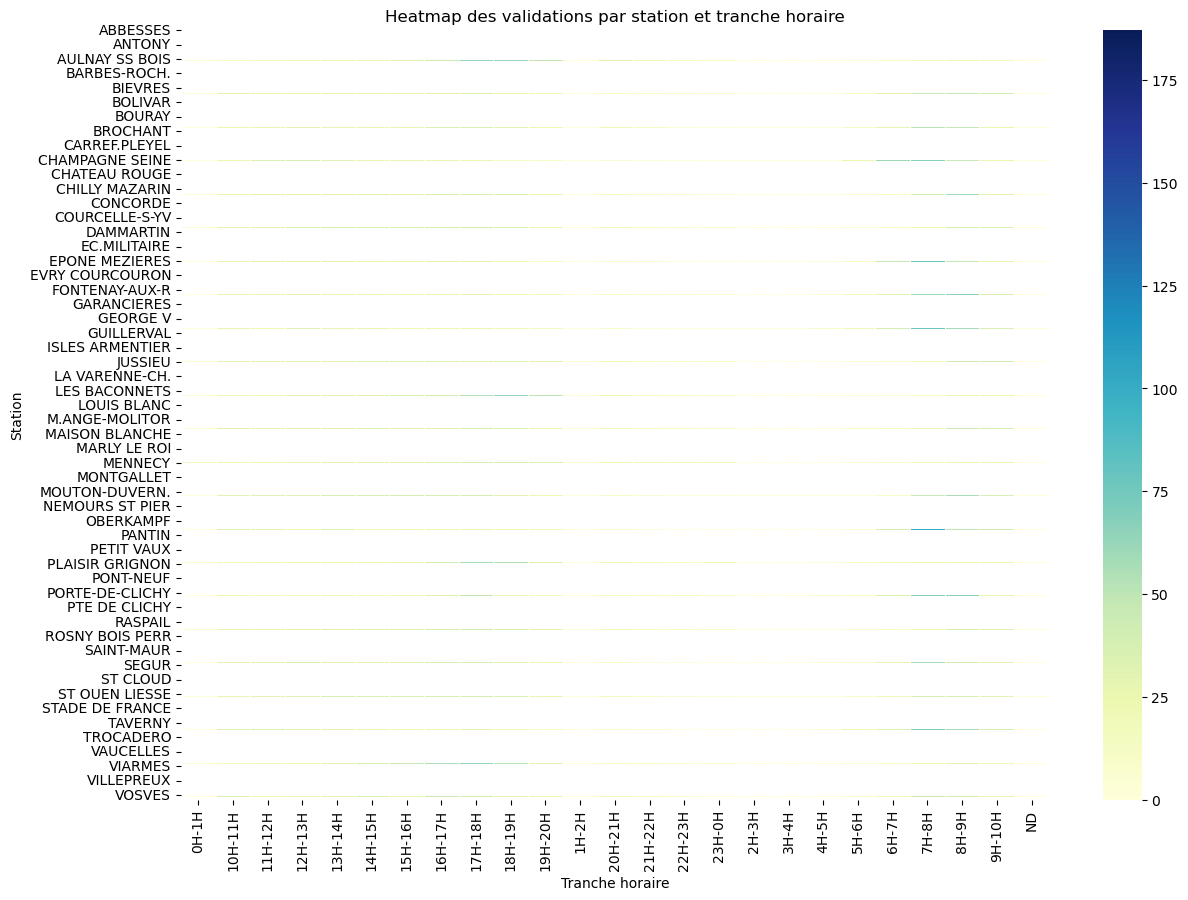

In [22]:
# Agréger les données par station et tranche horaire
df_heatmap = df.pivot_table(values='pourc_validations', index='LIBELLE_ARRET', columns='TRNC_HORR_60', aggfunc='sum').fillna(0)

# Graphique heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_heatmap, cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap des validations par station et tranche horaire')
plt.xlabel('Tranche horaire')
plt.ylabel('Station')
plt.show()
